# LINEAR REGRESSION

* Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events.

* It is a statistical method used in data science and machine learning for predictive analysis.

### Equation of a line : 

#### **=> y = mx + c**

* where m = slope or gradient or coefficient of x.

* y = Intercept

**So by the help of some properties and functions of Linear Regression we find the slope and intercept of a graph by the help of given data.**

## Linear Regression Single Variable

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df= pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


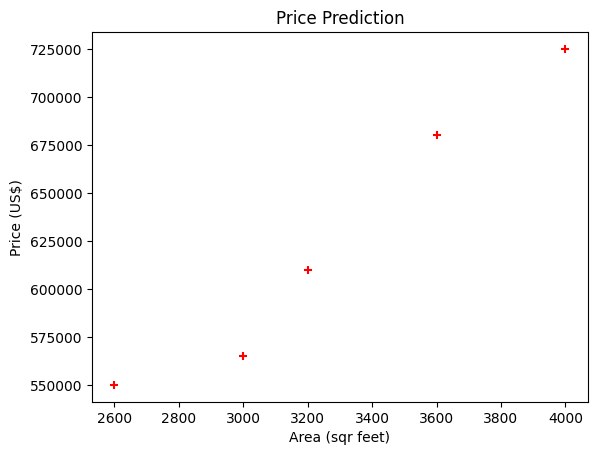

In [3]:
%matplotlib inline
plt.xlabel("Area (sqr feet)")
plt.ylabel("Price (US$)")
plt.title("Price Prediction")

plt.scatter(df.area,df.price,color='red',marker='+')


**👆 Scatter() : A scatter plot is a diagram where each value in the data set is represented by a dot.** 

In [4]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

* **In above fit means training a linear regression from the given data.**

In [5]:
reg.predict([[3300]])                                   # Directly finding 'y' in y=mx+c

c:\Users\amit2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

### **LOGIC BEHIND THE PREDICT FUNCTION**

### **y = mx + c**

### similarly **( price = m * area + b )**


* Finding coefficient or m :

In [6]:
reg.coef_

array([135.78767123])

* Finding Intercept ( c )

In [7]:
reg.intercept_

180616.43835616432

In [8]:
# y=m*x+b
y= 135.78767123*3300+180616.43835616432
y

628715.7534151643

* Ploting a chart of given data with the scatter plot in the same graph

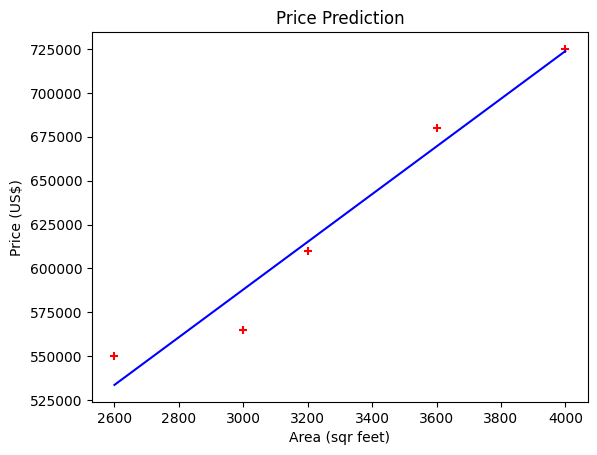

In [9]:
%matplotlib inline
plt.xlabel("Area (sqr feet)")
plt.ylabel("Price (US$)")
plt.title("Price Prediction")

plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='b')

#### **See above 👆 answer and the answer After using directly predict function are same**

* We are finding the value of a individual digit here but what if we have fine the multiple value of y or price at a time 👇

### Finding multiple prices or values at a time :

In [10]:
d= pd.read_csv('areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [11]:
d.head(3)

,area
0,1000
1,1500
2,2300


price predicting of all the area

In [12]:
p= reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

Creating a new column in a DataFrame 

In [13]:
d['prices']=p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Converting a new DataFrame into a new csv file 

In [14]:
d.to_csv('prediction.csv')                      

**Above code 👆 creates a new file or excel csv sheet but it also export index as well to remove index see below code 👇**

In [15]:
d.to_csv('prediction.csv', index=False)   

## Linear Regression With Multiple Variables / Multivariate Regression 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [17]:
df=pd.read_csv("homeprices2.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


**First we discuss about the filling or finding the NaN value or missing value in our data** 

#### **Calculating Median for Nan Value** 

**In Mathematical term**
* median = (n+1)/2  [ if n is odd ]

* median = [(n/2)+((n/2)+1)]/2   [ if n is even ]

In [20]:
import math
median_bedrooms=math.floor(df.bedrooms.median())
median_bedrooms

3

In [22]:
df.bedrooms=df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


### **Now we discuss about linear regression in multiple variables ( bedrooms, age, prices)**

#### Given these home prices find out price of a home that has ,

* 3000 sqr ft area, 3 bedrooms, 40 year old 

* 2500 sqr ft area, 4 bedrooms, 5 year old 

**y= mx +c**

**price = m1 * area + m2 * bedrooms + m3 * age + b**

price = dependent variable

area,bedrooms,age = independent variables

m1,m2,m3 = coefficients 

b = intercept 

In [24]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [25]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [26]:
reg.intercept_

383724.9999999998

#### Given these home prices find out price of a home that has ,

* 3000 sqr ft area, 3 bedrooms, 40 year old 


In [29]:
reg.predict([[3000,3,40]])

c:\Users\amit2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

#### **Logic behind this prediction 👆**

In [30]:
price =137.25*3000+-26025*3+-6825*40+383724.9999999998
price

444399.9999999998

#### Given these home prices find out price of a home that has ,

* 2500 sqr ft area, 4 bedrooms, 5 year old 

In [31]:
reg.predict([[2500,4,5]])

c:\Users\amit2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])